## import neccessariy liberaries

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### Load Data

In [42]:
dataset = pd.read_excel("/content/WAR data set.xlsx")
dataset.head()

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,35,9.5,0.147273,3,33.944,20.0,15.0
1,25,8.2,0.050909,3,25.458,20.0,8.0
2,30,9.5,0.550000,3,33.944,20.0,22.0
3,30,9.5,0.550000,7,33.944,20.0,27.3
4,30,9.5,0.550000,10,33.944,20.0,28.6


## EDA- Exploratory data Analysis

In [43]:
#independent and target variables
X = dataset.drop('Water Absorption reduction (%)', axis = 1)
y = dataset['Water Absorption reduction (%)']

In [44]:
# Train _Test Split
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=64)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (96, 6)
Testing set size: (13, 6)
Validation set size: (12, 6)


In [45]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform (X)
X=pd.DataFrame(X,columns=['Temprature(℃)','PH', 'CaCl₂ (mol/L)', 'Soaking Time (days)', 'Converted Enzyme Conc (g/L)', 'Urea Conc (g/L)	'])
X.head()

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)\t
0,0.816466,1.296392,-1.176596,-0.444484,-0.483277,-0.764817
1,-0.524001,0.083290,-1.483405,-0.444484,-1.968972,-0.764817
2,0.146233,1.296392,0.105635,-0.444484,-0.483277,-0.764817
3,0.146233,1.296392,0.105635,0.433599,-0.483277,-0.764817
4,0.146233,1.296392,0.105635,1.092162,-0.483277,-0.764817


### RF Model Devlopment

In [46]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF = RandomForestRegressor(max_depth= 15, min_samples_split=6, random_state=64)

In [47]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 64,
 'verbose': 0,
 'warm_start': False}

In [48]:
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=6, random_state=64)

### Model Evaluation

In [49]:
y_pred_train = RF.predict(X_train)
y_pred_test = RF.predict(X_test)
y_pred_val=RF.predict(X_val)

In [50]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, RF.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, RF.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, RF.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, RF.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, RF.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, RF.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, RF.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, RF.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, RF.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, RF.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, RF.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, RF.predict(X_val)):.4f}')


Training Set Metrics:
The RMSE on the training dataset is: 3.8324
The MSE on the training dataset is: 14.6876
The MAE on the training daset is: 2.8145
The r2_score on the training dataset is: 0.9314
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 3.4479
The MSE on the testing dataset is: 11.8881
The MAE on the testing dataset is: 2.6524
The r2_score on the testing dataset is: 0.9599
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 3.3104
The MSE on the validation dataset is: 10.9585
The MAE on the validation dataset is: 2.6889
The r2_score on the validation dataset is: 0.9694


## Hypeparamter Tunning (Optimization)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [53]:
# Perform GridSearchCV to find the best parameters
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)


In [54]:
# Fit GridSearchCV
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [55]:
# Print the best parameters
print("Best Parameters from Grid Search:", rf_grid.best_params_)

Best Parameters from Grid Search: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
y_pred_train = rf_grid.predict(X_train)
y_pred_test = rf_grid.predict(X_test)
y_pred_val=rf_grid.predict(X_val)

In [57]:
# Train final optimized model with best parameters
best_rf = rf_grid.best_estimator_


In [58]:
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, rf_grid.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, rf_grid.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, rf_grid.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, rf_grid.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, rf_grid.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, rf_grid.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, rf_grid.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, rf_grid.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, rf_grid.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, rf_grid.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, rf_grid.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, rf_grid.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 2.7406
The MSE on the training dataset is: 7.5108
The MAE on the training daset is: 1.9595
The r2_score on the training dataset is: 0.9649
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 3.4488
The MSE on the testing dataset is: 11.8944
The MAE on the testing dataset is: 2.5367
The r2_score on the testing dataset is: 0.9599
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 3.2019
The MSE on the validation dataset is: 10.2520
The MAE on the validation dataset is: 2.8450
The r2_score on the validation dataset is: 0.9714


### Actual vs Predicted Capacity

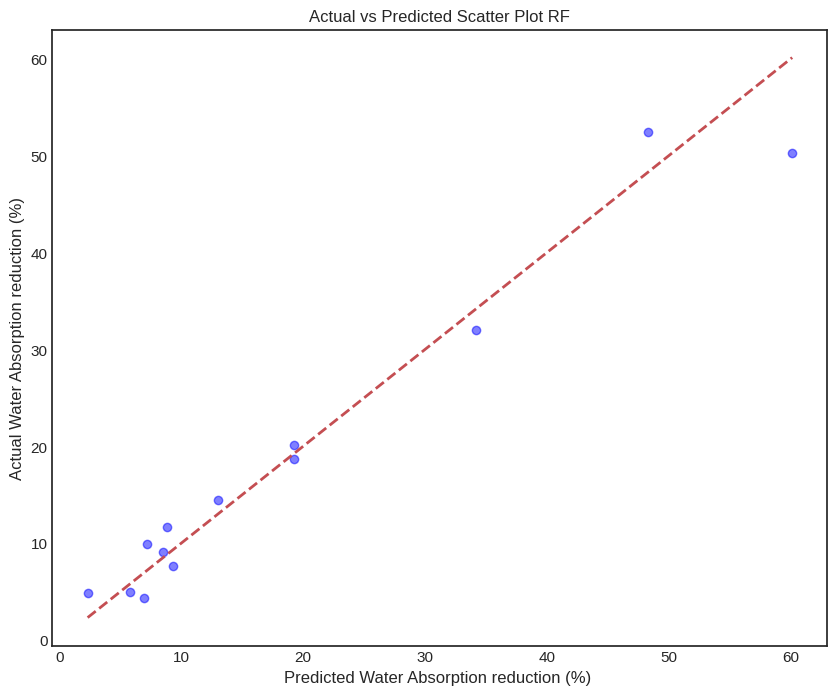

In [59]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-white')
y_pred = rf_grid.predict(X_test)
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("Predicted Water Absorption reduction (%) ")
plt.ylabel("Actual Water Absorption reduction (%)")
plt.title("Actual vs Predicted Scatter Plot RF")
plt.show()

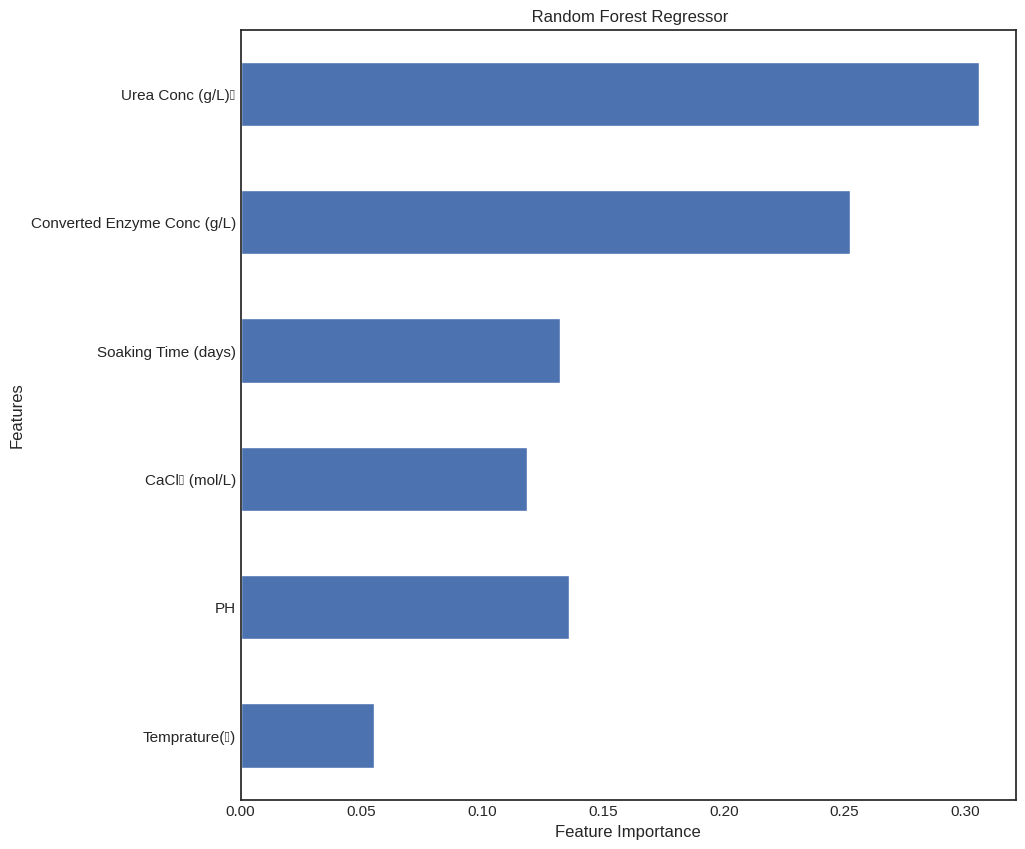

In [60]:
importances = pd.Series(best_rf.feature_importances_ , index=X.columns)
importances.plot(kind = 'barh', figsize=(10,10))
plt.style.use('seaborn-v0_8-white')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(" Random Forest Regressor")
plt.show()